# **Classificando Fake News**

Vivemos em uma época que recebemos informações a todo momento, das mais diferentes formas e fontes. Se por um lado há pontos benéficos como, por exemplo, o acesso ao conhecimento está muito mais fácil, também há pontos negativos e o que vamos abordar aqui é, justamente, um desses pontos negativos: a **Fake News**.

É bem provável que em alguma momento você já tenho lido alguma notícia falsa (fake news) ou, pelo menos, lido o título de uma. Pois, quando somos "bombardeados" por informações de todos os lados, a desinformação acaba se tornandoum grande problema.

Assim, de acordo com a Wikipedia, as **Fake News (Notícias Falsas)** são definidas como:
> Consiste na distribuição deliberada de desinformação ou boatos via jornal impresso, televisão, rádio, ou ainda online, como nas mídias sociais. Este tipo de notícia é escrito e publicado com a intenção de enganar, a fim de se obter ganhos financeiros ou políticos, muitas vezes com manchetes sensacionalistas, exageradas ou evidentemente falsas para chamar a atenção.
> 
> O conteúdo intencionalmente enganoso e falso é diferente da sátira ou paródia. Estas notícias, muitas vezes, empregam manchetes atraentes ou inteiramente fabricadas para aumentar o número de leitores, compartilhamento e taxas de clique na Internet.

## **O impacto das Fake News**

As fake news podem ser disseminadas de diversas maneiras desde uma simples conversa entre amigos ou familiares ou até mesmo em grandes portais de notícias, com isso muitas vezes não vamos atrás de checar se uma notícia é falsa ou não.

Assim, as fake news podem se tornar um grande problema, principalmente, em casos que podem influenciar resultados de eleições, políticas públicas, opinião pública sobre determinados projetos, o combate às pandemias e até pessoas públicas, sejam elas do meio político, jornalístico, artístico ou qualquer outro meio que possa exercer certa influência.

## **Sobre o projeto**

Atualmente, temos diversas ferramentas que podem nos auxiliar a identificar e filtrar as fakes news. Assim, utilizando modelos de *Machine Learning* como **Redes Neurais** podemos verificar muitas fontes de notícias e identificar o que é falso e o que é verdadeiro, de forma mais fácil ainda.

> O objetivo desse projeto é construir um modelo que seja capaz de classificar as notícias entre falsas ou verdadeiras.

Para a construção do modelo, será utilizado a biblioteca **TensorFlow** que irá treinar as Redes Neurais para fazer o trabalho de classificação.

## **Importando as bibliotecas necessárias e os dados**

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Configurando o notebook
np.random.seed(77)
sns.set(style="white")

# Não mostrar avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando os dados
df = pd.read_csv("./Dataset/fake_news.csv")

# Verificando os dados
print(f"Os dados possuem {df.shape[0]} linhas e {df.shape[1]} colunas.")
print("\n")
print("As primeiras entradas dos daods são:")
df.head()

Os dados possuem 44898 linhas e 5 colunas.


As primeiras entradas dos daods são:


,title,text,subject,date,Target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


## **Sobre os dados**

Os dados possuem aproximadamente 45 mil linhas e 5 colunas, sendo:
- `title`: título da notícia;
- `text`: texto da notícia;
- `subject`: assunto da notícia;
- `date`: data em que a notícia foi publicada;
- `Target`: variável objetivo que está dividida em:
    - 1 $\rightarrow$ True (notícia verdadeira);
    - 0 $\rightarrow$ False (notícia falsa/fake news).

## **Tratamento dos dados**

Nesse projeto, os dados estão em linguagem natural, ou seja, no foramto `string`, então é necessário ter algum conhecimento de Processamento de linguagem natural (NLP) para tratar os dados da melhor forma possível, para que o modelo seja bem construído e assim termos os melhores resultados.

In [3]:
# Tratamento do texto das notícias
def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df['text'] = df['text'].apply(clean_text)
df.head()

,title,text,subject,date,Target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,donald trump s white house is in chaos ...,News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,now that donald trump is the presumptive...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,mike pence is a huge homophobe he suppo...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,san francisco reuters california attorne...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,twisted reasoning is all that comes from...,politics,"Apr 25, 2017",1


Então, é necessário separar os dados em treino, validação e teste, para a construção do modelo. Assim:

In [4]:
# Separando os dados em treino, validação e teste
train, test = train_test_split(df)
train, validation = train_test_split(train, test_size = 0.2)

print("Entradas do Conjunto de Dados")
print(f"Dados de treino: {len(train)} linhas.")
print(f"Dados de validação: {len(validation)} linhas.")
print(f"Dados de treino: {len(test)} linhas.")

Entradas do Conjunto de Dados
Dados de treino: 26938 linhas.
Dados de validação: 6735 linhas.
Dados de treino: 11225 linhas.


## **Pré-processamento de Strings - NLP**

O foco desse projeto é o ***Deep Learning*** e o desenvolvimento de um modelo baseado em **Redes Neurais**, assim irei apenas mostrar de maneira bem resumida esse assunto.

Resumidamente, nesta etapa é feita a simplificação do texto, para que o modelo entenda e processe de maneira mais fácil. E para isso, irei utilizar uma técnica chama ***Tokenizing***.

Basicamente, *Tokenizing* (Em tradução livre, Tokenização) é uma etapa que separa longas strings de texto em pedaços menores de texto, chamados de tokens.

<img src='tokenization.jpg' width="600">

Para se aprofundar e entender melhor o assunto, deixarei os seguintes links:
- [A General Approach to Preprocessing Text Data](https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html)
- [Tokenization and Text Data Preparation with TensorFlow & Keras](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html)

In [5]:
# Preparação dos dados para o modelo
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

# Aplicação das técnicas tokenizing e padding
training_sequences = tokenizer.texts_to_sequences(np.array(train.text))
training_padded = pad_sequences(training_sequences, truncating = trunc_type, padding = pad_type)

max_length = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation.text))
validation_padded = pad_sequences(validation_sequences, padding = pad_type, truncating = trunc_type, maxlen = max_length)

# Criação das arrays com inputs
x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['Target'].values
y_val = validation['Target'].values

In [6]:
# Verificação do tamanho dos arrays
print("Tamanho dos arrays")
print(f"Treino: {len(x_train)} linhas.")
print(f"Resposta: {len(y_train)} linhas.")

Tamanho dos arrays
Treino: 26938 linhas.
Resposta: 26938 linhas.


## **Construção do Modelo**

Com os dados já processados, vamos construir o modelo.

O método *RandomSearch* foi realizado pelo Cientista de Dados e Professor [Carlos Melo](https://sigmoidal.ai/) para ajustar os melhores parâmetros, foi utilizado os parâmetros, pois este processo é muito lento e iria tomar muito tempo, então optei por utilizar os mesmos parâmetros já encontrados pelo Professor para a construção do modelo. Assim:

In [7]:
# Ajuste do modelo
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length = max_length), 
        tf.keras.layers.Conv1D(16, 5, activation = 'relu'), 
        tf.keras.layers.GlobalMaxPooling1D(), 
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, verbose = 2, epochs = 3, validation_data = (x_val, y_val), 
                    callbacks = [tf.keras.callbacks.EarlyStopping('val_loss', patience = 6)])

Epoch 1/3
842/842 - 1548s - loss: 0.1082 - accuracy: 0.9643 - val_loss: 0.0053 - val_accuracy: 0.9985
Epoch 2/3
842/842 - 1693s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 3/3
842/842 - 1665s - loss: 9.1976e-04 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9994


Os resultados aparentam ser bem promissores, no entanto necessitam de uma maior investigação. Porém, satisfez o objetivo desse projeto que é de mostrar a eficácia das Redes Neurais. Assim, vamos visualizar os resultados:

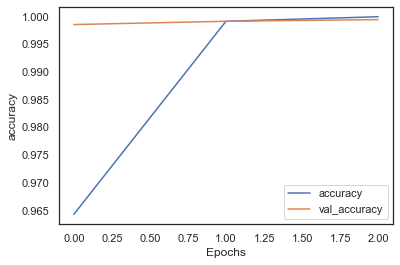

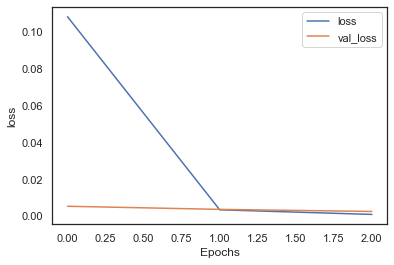

In [8]:
# Visualização dos resultados
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

## **Previsões utilizando os dados de teste**

Já construímos um *pipeline* ótimo para o tratamento dos dados, treinamos, ajustamos e tivemos ótimos resultados com os dados de validação.

O modelo construído está pronta, mas ainda precisamos fazer previsões com ele e verificar o seu desempenho. Assim:

In [9]:
# Tratamento dos dados de teste
test_sequences = tokenizer.texts_to_sequences(np.array(test.text))
test_padded = pad_sequences(test_sequences, padding = pad_type, truncating = trunc_type, maxlen = max_length)

In [10]:
# Fazendo previsões
preds = np.round(model.predict(test_padded))

In [11]:
# Verificando o tamanho dos resultados
len(preds)

11225

In [13]:
# Verificando a acurácia
acc = np.sum(1 if i == j else 0 for i, j in zip(preds, test["Target"].values)) / len(test)

print(f"Accuracy: {acc}")

Accuracy: 0.9989309576837416
